In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from util import getBinaryData, sigmoid, sigmoid_cost, error_rate

class LogisticModel(object):
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate= 10e-7, reg=0, epochs=100, show_fig=False):
        X,Y = shuffle(X,Y)
        Xvalid, Yvalid= X[-1000:], Y[-1000:]
        
        N,D = X.shape
        self.W = np.random.randn(D)/np.sqrt(D)
        self.b= 0
        
        costs= []
        best_validation_error= 1
        
        for i in xrange(epochs):
            pY= self.forward(X)
            
            #Gradient Descent
            self.W -= learning_rate* (X.T.dot(pY-Y)+ reg*self.W)
            self.b -= learning_rate* ((pY - Y).sum() + reg*self.b)
            
            
            if i% 20 ==0:
                pYvalid = self.forward(Xvalid)
                c= sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e= error_rate(Yvalid, np.round(pYvalid) )
                print "i: ", i, "cost:", c, "error:", e
                
                if e < best_validation_error:
                    best_validation_error = e
                
        print "best_validation_error:",  best_validation_error
                
        if show_fig:
            plt.plot(costs)
            plt.show()
                    
    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)
        
    def predict(self,X):
        pY = self.forward(X)
        return np.round(pY)
        
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(y,prediction)
                    
            

i:  0 cost: 709.816701529 error: 0.503
i:  20 cost: 682.236963393 error: 0.404
i:  40 cost: 674.809457126 error: 0.4
i:  60 cost: 668.941688024 error: 0.393
i:  80 cost: 664.127138178 error: 0.386
best_validation_error: 0.386


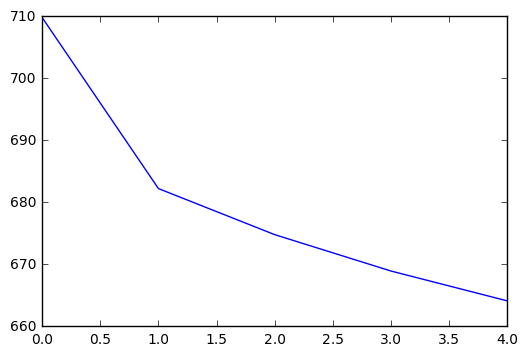

NameError: global name 'y' is not defined

In [17]:
def main():
    X, Y = getBinaryData()

    X0 = X[Y==0, :]
    X1 = X[Y==1, :]
    X1 = np.repeat(X1, 9, axis=0)
    X = np.vstack([X0, X1])
    Y = np.array([0]*len(X0) + [1]*len(X1))

    # N, D = X.shape
    # print "N:", N
    # print "p(Y=0):", np.sum(Y == 0) / float(N), "p(Y=1):", np.sum(Y == 1) / float(N)
    
    model = LogisticModel()
    model.fit(X, Y, show_fig=True)
    model.score(X, Y)
    # scores = cross_val_score(model, X, Y, cv=5)
    # print "score mean:", np.mean(scores), "stdev:", np.std(scores)

if __name__ == '__main__':
    main()
